In [7]:
import os
import json
import numpy as np
#from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import decomposition



In [16]:
def pool_sentence_embs(path, pooling_layer=-1, pooling_strategy='mean'):
    embs = []
    sents = []
    with open(path, 'r') as f:
        for line in f.readlines():
            line = line.strip()
            dic = json.loads(line)
            token_embs = []
            tokens = []
            for index in range(len(dic['features'])): #index is word in sent
                token_embs.append(dic['features'][index]['layers'][pooling_layer]['values'])
                tokens.append(dic['features'][index]['token'])
            sents.append(" ".join(tokens))
            token_embs = np.asarray(token_embs) #length of sentence X hidden dimension 768
            if pooling_strategy == "mean":
                embs.append(token_embs.mean(0))

        embs = np.asarray(embs)
        #print(embs.shape)
        #print (sents)
    return embs
            # sent = dic[]

In [27]:
def main(path):
    embs = pool_sentence_embs(path)[1:]
    df = pd.read_csv(r'C:\Users\Y\Documents\MILA\ACL_Workshop_Gender_Bias_NLP\datasets\gutenberg\plotting_test_gutenberg.csv', encoding ='utf - 8', index_col = False)
    df2 = pd.read_csv(r'C:\Users\Y\Documents\MILA\test_200.csv', encoding = "ISO-8859-1")
    df3 = pd.read_csv(r'C:\Users\Y\Documents\MILA\final_labels_YAC_figure8.csv', encoding = 'utf-8')
    
    target = df['label'].values
    target2 = df2['label'].values
    target3 = df3['YAC Average']
    print(len(target3))
    %matplotlib notebook

    centers = [[1, 1], [-1, -1], [1, -1]]
    #iris = datasets.load_iris()
    #X = iris.data
    #y = iris.target

    fig = plt.figure(1, figsize=(10, 8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    

    plt.cla()
    pca = decomposition.PCA(n_components=14)
    pca.fit(embs)
    embs = pca.transform(embs)

    #for labels in target:
        #ax.text3D(embs[target == 0].mean(),
                  #embs[target == 1].mean(),
                  #horizontalalignment='center',
                  #bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(target3, [1, 0]).astype(np.float)
    #ax.scatter(embs[:, 0], embs[:, 1], cmap=plt.cm.nipy_spectral,
               #edgecolor='k')
    ax.scatter(embs[:, 0], embs[:, 1], c=target3, cmap=ListedColormap(["blue", "red"]), marker='.', s=100)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()

200


<IPython.core.display.Javascript object>


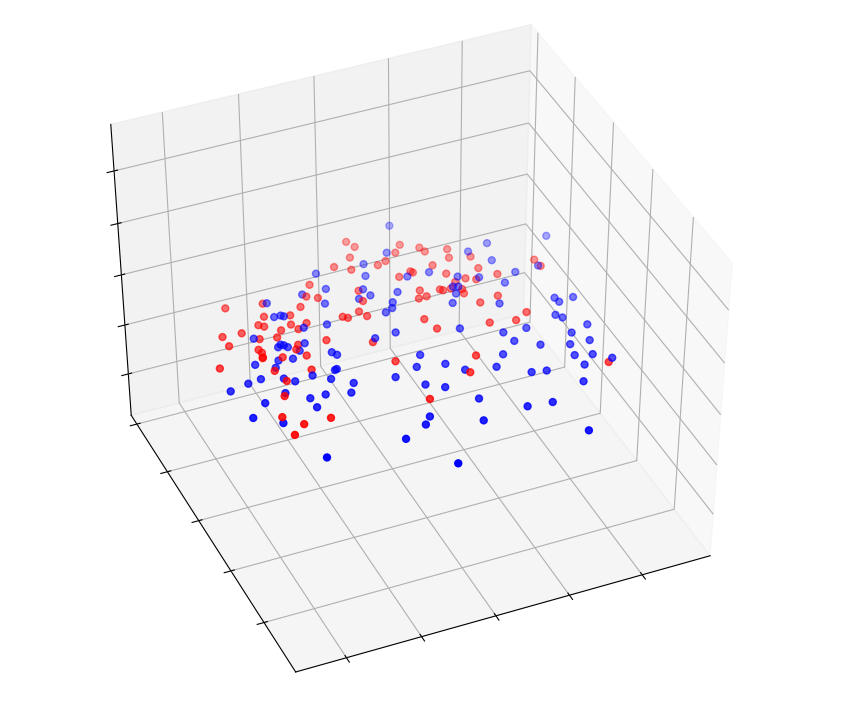

In [28]:
if __name__ == '__main__':   
    os.chdir('C:/Users/Y/Documents/MILA')
    main('final_labels_YAC_figure8_sents.json')

In [41]:
def main(path):
    embs = pool_sentence_embs(path)[1:]
    df_2d = pd.read_csv(r'C:\Users\Y\Documents\MILA\final_labels_YAC_figure8.csv', encoding = 'utf-8')

    Y = df_2d['YAC Average']
    print(len(Y))

    X = embs
    pca = decomposition.PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    
    plt.figure()
    #colors = ['blue','dankorange']
    lw = 2
    
    plt.scatter(X_r[Y, 0], X_r[Y, 1], cmap=ListedColormap(["blue", "red"]))
    
    plt.show()

    #fig = plt.figure(1, figsize=(10, 8))
   #plt.clf()
    #ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    

   # plt.cla()
    #pca = decomposition.PCA(n_components=2)
    #pca.fit(embs)
    #embs = pca.transform(embs)

    #for labels in target:
        #ax.text3D(embs[target == 0].mean(),
                  #embs[target == 1].mean(),
                  #horizontalalignment='center',
                  #bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    #y = np.choose(target3, [1, 0]).astype(np.float)
    #ax.scatter(embs[:, 0], embs[:, 1], cmap=plt.cm.nipy_spectral,
               #edgecolor='k')
    #ax.scatter(embs[:, 0], embs[:, 1], c=target3, cmap=ListedColormap(["blue", "red"]), marker='.', s=100)

    ##ax.w_xaxis.set_ticklabels([])
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])

    #plt.show()

200


<IPython.core.display.Javascript object>


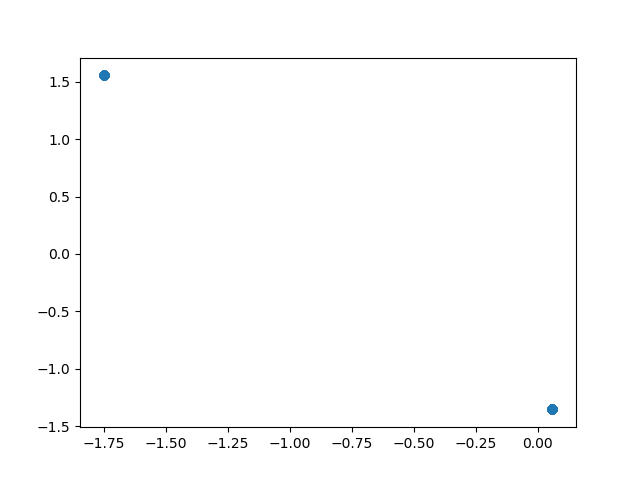

In [42]:
if __name__ == '__main__':   
    os.chdir('C:/Users/Y/Documents/MILA')
    main('final_labels_YAC_figure8_sents.json')